In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import f_regression, mutual_info_regression


#  TIP: 1. Research and import desired feature selection methods from https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection
#       2. For k-fold cross validation, consider https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html 
#                                         and/or https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
#       3. Research and import desired classification algorithms from https://scikit-learn.org/stable/supervised_learning.html
#       4. Research and import desired clustering algorithms from https://scikit-learn.org/stable/modules/clustering.html


# Instructions

For each question, a rough outline has been provided to help you get started under "Part 1.x.x: Work". Feel free to either follow the outline or use your own method for solving the problem. In either case, however, please make sure to include your work in these sections and fill in your answer in the cell titled "Part 1.x.x: Answer".

**Embedding Images in the Notebook**

To upload an image in a markdown cell in Jupyter Notebook:
1. Go to the menu bar and select Edit -> Insert Image.

2. Select image from your disk and upload.

3. Press Ctrl+Enter or Shift+Enter.

This will make the image as part of the notebook and you don't need to upload it in the directory

**Export Jupyter Notebooks**  
In your local computer, open the notebook you would like to export and navigate to 'File' at the top menu bar. By clickling 'File', you can find 'Download as' in the drop-down menu. Select the format you want to export the notebook as: either directly as a pdf, or if you download it as an html file, use a website like [html2pdf.com](https://html2pdf.com) to convert it to a pdf file for submission on Gradescope.

Colab does not seem to support exporting their notebooks to other formats, so if you choose to use Colab, you will need to download the notebook as an .ipynb file before following the steps above on your local machine.

# Question 1

### Read Data

In [2]:
PATH_TO_Q1_DATA = 'data/HW2_Q1_DATA.csv'
df = pd.read_csv(PATH_TO_Q1_DATA)

In [3]:
pd.set_option('display.max_columns', None)  # show all columns with head()
df.head()

,4E-BP1,ADA,AREG,AXIN1,BACH1,BIRC2,BTN3A2,CASP-8,CCL11,CCL19,CCL20,CCL23,CCL25,CCL28,CCL3,CCL4,CD244,CD28,CD40,CD5,CD6,CD83,CD8A,CDCP1,CDSN,CKAP4,CLEC4A,CLEC4C,CLEC4D,CLEC4G,CLEC7A,CNTNAP2,CSF-1,CST5,CX3CL1,CXADR,CXCL1,CXCL10,CXCL11,CXCL5,CXCL6,CXCL9,DCBLD2,DCTN1,DFFA,DNER,DPP10,EDAR,EIF4G1,EIF5A,EN-RAGE,FAM3B,FCRL6,FGF-19,FGF-21,Flt3L,GLB1,HCLS1,HEXIM1,HGF,HNMT,HSD11B1,IFN-gamma,IFNLR1,IL-10RA,IL-10RB,IL-12B,IL-17A,IL-17C,IL-18R1,IL-20RA,IL18,IL5,IL6,IL7,IL8,IRAK1,ITGA11,ITGA6,ITGB6,ITM2A,JUN,KLRD1,KRT19,LAG3,LAMP3,LAP TGF-beta-1,LIF-R,LILRB4,LY75,MASP1,MCP-1,MCP-2,MCP-4,MILR1,MMP-1,MMP-10,NCR1,NT-3,NTF4,OPG,OSM,PADI2,PD-L1,PIK3AP1,PPP1R9B,PRDX1,PRDX3,PRDX5,PSIP1,PTH1R,SCF,SH2D1A,SIRT2,SIT1,SLAMF1,SPRY2,SRPK2,STAMBP,STC1,TGF-alpha,TNF,TNFB,TNFRSF9,TNFSF14,TRAIL,TRANCE,TREM1,TRIM21,TWEAK,uPA,VEGFA,ZBTB16,Condition
0,27.718344,5.734644,13.165561,6.770850,0.000000,9.756987,0.000000,6.161444,0.000000,3.545201,0.000000,8.817527,7.508032,2.422742,0.000000,6.843969,18.773615,0.000000,18.730868,7.455245,26.659559,4.189390,1.076872,0.000000,0.000000,0.000000,11.826296,7.788437,0.000000,16.220314,1.109837,10.874609,5.293797,9.480353,3.203696,6.252064,0.000000,26.693942,0.000000,0.000000,7.368058,13.041884,0.000000,9.637007,0.000000,13.397451,3.405191,1.438115,0.000000,0.779473,0.000000,3.286780,4.291350,4.174334,0.000000,8.912544,0.000000,15.399080,17.348777,11.560710,0.000000,0.000000,0.815476,5.170512,4.020843,0.000000,0.000000,2.436370,0.000000,0.000000,0.000000,1.622146,4.472475,0.000000,0.000000,0.000000,8.039560,15.033599,12.192460,2.470746,13.304297,7.517567,0.000000,7.864877,4.191008,3.132020,8.541414,0.000000,9.163430,1.620337,0.000000,0.000000,0.000000,0.000000,0.000000,28.856916,9.504446,0.000000,0.000000,3.975596,16.192791,0.000000,0.000000,0.000000,0.985249,11.178848,15.181206,14.145702,16.986303,8.658794,7.202860,0.964152,2.125859,3.510396,15.197014,0.000000,0.000000,0.000000,6.309584,8.302339,12.000191,0.000000,0.998187,17.015074,0.000000,0.000000,0.000000,0.000000,10.462921,8.162390,3.209589,0.0,7.846367,CoV2
1,0.000000,13.791418,5.884233,0.396271,12.521125,0.000000,7.558042,4.814161,0.000000,0.000000,0.555607,10.962094,0.000000,2.648440,0.000000,0.000000,7.966805,2.731494,0.699221,11.196644,5.726753,6.832898,10.350866,0.239732,6.455786,4.033267,0.000000,0.000000,18.942073,3.111585,33.275970,3.360276,6.135610,0.000000,0.000000,0.000000,1.859586,6.974876,0.000000,16.929481,0.000000,13.068265,5.977234,19.969867,14.074089,4.800421,0.000000,3.175309,5.423078,43.495684,1.933688,0.000000,8.305734,0.000000,31.627888,2.767051,2.895586,15.693953,7.802739,0.000000,0.000000,5.635262,32.458745,1.653591,11.295072,0.000000,7.852373,6.740466,5.331868,4.422822,0.000000,0.000000,0.841615,0.251800,6.471288,0.000000,2.305014,11.732910,5.069960,6.585386,9.957475,0.000000,0.237587,0.000000,1.785264,0.000000,7.199421,2.698841,0.267144,0.000000,9.372084,0.000000,7.774374,13.806183,0.000000,0.000000,4.643473,15.595458,0.000000,0.000000,10.105447,9.701070,1.397358,2.375529,0.000000,13.456537,0.000000,0.000000,7.482231,10.512135,6.418627,0.000000,15.694330,2.552504,20.129469,14.268805,15.909556,1.923489,0.000000,12.683408,3.810757,5.165126,12.456605,6.177402,5.582112,28.143195,8.333056,1.801868,2.697739,9.918408,1.576225,0.0,1.988058,CoV2
2,0.000000,0.000000,2.303576,14.225052,3.579328,0.000000,7.902642,0.000000,0.896923,0.000000,0.000000,6.829464,6.176597,36.725478,14.500758,2.852927,10.440139,0.000000,1.984527,12.205972,4.904689,6.295782,5.977952,0.000000,35.676186,21.463649,10.210970,0.000000,13.580720,6.555678,11.049189,7.134474,13.464460,0.000000,0.000000,0.000000,7.716326,21.698020,0.000000,0.000000,3.640113,17.448447,0.000000,7.834174,8.478314,3.700956,0.000000,0.000000,8.284261,1.611970,0.000000,4.126854,14.547810,0.465372,2.051328,12.058449,4.064884,0.000000,19.906368,19.271130,1.949508,0.000000,0.000000,0.000000,2.522496,0.000000,6.872648,2.216933,4.436103,7.143954,8.589794,14.503386,6.697591,22.231499,4.987172,17.674558,4.813506,7.469

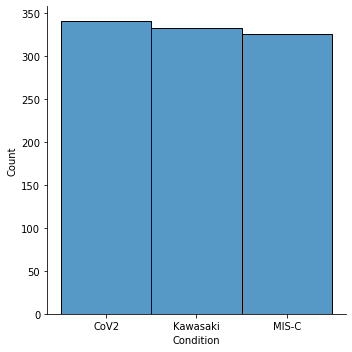

In [4]:
# histogram by condition just to get an idea for the data
sns.displot(df, x="Condition")

<AxesSubplot:xlabel='AREG', ylabel='Condition'>

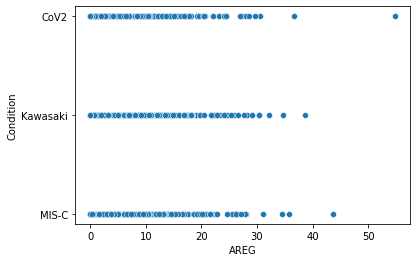

In [5]:
# look at data
sns.scatterplot(data=df, x="AREG", y="Condition")

### Construct Data object

In [6]:
class ImmunologicalData:
    
    def __init__(self, as_frame):
        self.data = None
        self.target = None
        self.feature_names = None
        self.frame = None
        
        if as_frame:
            df = pd.read_csv('data/HW2_Q1_DATA.csv')
            
            # encode categorical label??
            def get_condition_num(condition):
                if condition == "CoV2":
                    return 1
                elif condition == "Kawasaki":
                    return 2
                elif condition == "MIS-C":
                    return 3
                else:
                    raise IllegalArgumentException("Condition not recognized.")
                    
            df["Condition_Num"]=df["Condition"].apply(get_condition_num) 
            
            self.frame = df
            self.data = df.drop(["Condition", "Condition_Num"], axis=1)            
            self.target = df["Condition_Num"]           
            self.feature_names = list(df.columns)            

In [7]:
# # save column lists
# regressor_cols = list([i for i in range(0,133)]) # columns 1 to 133
# label_col = 134 # Condition_num column

# # convert categorical label into number??
# def get_condition_num(condition):
#     if condition == "CoV2":
#         return 1
#     elif condition == "Kawasaki":
#         return 2
#     elif condition == "MIS-C":
#         return 3
#     else:
#         raise IllegalArgumentException("Condition not recognized.")
    
# df["Condition_Num"]=df["Condition"].apply(get_condition_num)
# df.head()

## Part 1.1: Filter-based Feature Selection

### Part 1.1.1: Work

In [8]:
# TODO: Apply a filter-based feature selection method of your choice using 10-fold cross validation 
#       and use the results to choose the top 20 features

# TIP: Scikit-learn provides implementations of many useful statistical measures.

#       Pearson’s Correlation Coefficient: f_regression()
#       ANOVA: f_classif()
#       Chi-Squared: chi2()
#       Mutual Information: mutual_info_classif() and mutual_info_regression()

#      Also, SciPy provides implementations of many more statistics, such as
#      Kendall’s tau (kendalltau) and Spearman’s rank correlation (spearmanr).


# ?? goal is to identify features that are highly correlated and remove them, to have 20 left
# ?? goal is to identify the 20 features that are most correlated

In [9]:
# def split_regressors_and_label(df, rows, label_cols, label):
#     '''Splits df into a DataFrame of regressors and a Series of the label column, then returns the result as a tuple of (Regressor DataFrame,Label Series).
    
#        df           dataframe to split
#        rows         list of which rows to select for this fold, indexed from 0  
#        label_cols   list of column names which are not regressors and should be removed from regressor set
#        label        name of label column
#     '''
#     df_selected = df.iloc[rows]
    
#     df_regressors = df_selected.drop(label_cols, axis=1)
#     s_label = df_selected[label]
#     return (df_regressors,s_label)

#### single f-test on Pearson's correlation coefficient (learning example with single regressor column)
high negative or positive correlation results in high F-score

In [10]:
from sklearn.feature_selection import f_regression
from scipy.stats import pearsonr

# test data
a = np.array([[1, 6, 5], [2, 4, 5], [3, 5, 5], [4, 3, 5], [5, 2, 5]]) # create an array
df_test=pd.DataFrame(data=a, columns=["regressor1", "label1", "extra"])
print(df_test)
print()

# split dataframe into separate regressors DataFrame and label Series
X = df_test.drop(["label1", "extra"], axis=1)
y = df_test["label1"]
print(X)
print()
print(y)
print()

# pearson's correlation coefficient
# The Pearson correlation evaluates the linear relationship between two continuous variables.
print(df_test.drop("extra", axis=1).corr(method='pearson')) # expecting -0.90
print()

# f-test of pearson's correlation coefficient
F_scores, p_values = f_regression(X, y, center=True)
print(F_scores) # expecting 12.78947368
print(p_values) # expecting 0.03738607

   regressor1  label1  extra
0           1       6      5
1           2       4      5
2           3       5      5
3           4       3      5
4           5       2      5

   regressor1
0           1
1           2
2           3
3           4
4           5

0    6
1    4
2    5
3    3
4    2
Name: label1, dtype: int64

            regressor1  label1
regressor1         1.0    -0.9
label1            -0.9     1.0

[12.78947368]
[0.03738607]


#### single f-test on Pearson's correlation coefficient (actual data)

In [11]:
# # row_count = len(df.index)

# # split data into training and test set
# rows = [i for i in range(0,len(df.index))]

# # split DataFrame into regressors and label
# (X,y) = split_regressors_and_label(df, rows, label_cols=["Condition", "Condition_Num"],label="Condition_Num")
# print(X.shape)
# print(y.shape)



# # f-test of pearson's correlation coefficient
# F_scores, p_values = f_regression(X, y, center=True)
# print(F_scores.shape) # one score for each regressor column
# print(p_values.shape) # one p-value for each regressor column score


# # build DataFrame of results
# 


# # sort p values
# # ?? how to sort without losing index to know which column this is
# np.sort(F_scores) # find that there aren't 20 p-values under 0.05...

### Perform Pearson's correlation coefficient tests for 10-fold cross validation

In [12]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import f_regression

# get data
idata = ImmunologicalData(as_frame=True)
X = idata.data
y = idata.target


# build DataFrame to store results
df_result = pd.DataFrame(columns=['k','Regressor','F_score','P_value']).astype(dtype= {'k':'int64','Regressor':'object', 'F_score':'float64','P_value':'float64'})

#?? how to remember which rows in which fold
#?? where does k-fold come into the picture? test vs training data?
#?? how to keep track of which column for which F_score?
kf=KFold(n_splits=10, shuffle=False)  
for k, (train, test) in enumerate(kf.split(X, y)):

    # get training rows for this fold
    X_train = X.iloc[train] 
    y_train = y.iloc[train]
    
    # run Pearson's correlation coefficient
    f_scores, p_values = f_regression(X_train, y_train, center=True)
                
    for i, f_score in enumerate(f_scores):
        
        # add row to result DataFrame for each F-score
        col_name = idata.feature_names[i]
        p_value = p_values[i]
        new_row = pd.Series([k+1,col_name,f_score,p_value], index = df_result.columns)
        df_result = df_result.append(new_row, ignore_index=True)
    

In [13]:
df_result.shape

(1330, 4)

In [16]:
# compute average F_score and p_value across all training sets
# reset_index() to add Regressor column to DataFrame
df_means=df_result.drop("k",axis=1).groupby(["Regressor"]).mean().reset_index()

# # filter out F_scores with p-value > 0.05
# df_filtered=df_means[df_means['P_value']<=0.05]

# select 20 regressors with largest F-scores
df_top_20=df_means.sort_values(by="F_score", ascending=False).head(20)
print(df_top_20)
print()

list_top_20 = list(df_top_20["Regressor"])
print(*list_top_20, sep=", ")

    Regressor    F_score       P_value
59        HGF  49.816711  1.856227e-11
51      FAM3B  48.003948  2.944484e-11
79      ITGB6  34.119862  2.499567e-08
100       OPG  31.586697  1.972983e-07
119      STC1  31.120322  4.848779e-08
47       EDAR  30.549715  6.217153e-08
27     CLEC4C  27.522199  5.974571e-07
23      CDCP1  21.292353  1.502960e-05
121       TNF  17.330040  8.653982e-05
73        IL6  17.161013  1.220006e-04
67     IL-17A  15.419758  1.803032e-04
19        CD5  14.299028  2.647015e-04
46      DPP10  13.890368  2.951712e-04
42     DCBLD2  13.070751  4.005152e-04
12      CCL25  13.068090  4.579635e-04
114      SIT1  12.370420  9.130655e-04
26     CLEC4A  11.778288  1.287744e-03
132       uPA  10.165089  3.137807e-03
15       CCL4   9.454490  4.196223e-03
127     TREM1   9.020582  4.074127e-03

HGF, FAM3B, ITGB6, OPG, STC1, EDAR, CLEC4C, CDCP1, TNF, IL6, IL-17A, CD5, DPP10, DCBLD2, CCL25, SIT1, CLEC4A, uPA, CCL4, TREM1


### Part 1.1.1: Answer

List the top 20 features you found: 
**HGF, FAM3B, ITGB6, OPG, STC1, EDAR, CLEC4C, CDCP1, TNF, IL6, IL-17A, CD5, DPP10, DCBLD2, CCL25, SIT1, CLEC4A, uPA, CCL4, TREM1**

### Part 1.1.2: Work

In [15]:
# TODO: Create and plot a 20 x 20 correlation heat map using your features from part 1.1.1

# TIP: 1. Pandas has a correlation functionality for dataframes
#         https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
#      2. Seaborn has a heatmap functionality
#         https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [18]:
# select top 20 columns
df_features=idata.data.loc[:][list_top_20]
df_features.shape

# heatmap
cor=df_features.corr(method='pearson')
sns.heatmap(cor)

(1000, 20)

### Part 1.1.2: Answer

**Plot the heatmap in one of the above cells or embed it as an image in this cell**

What is the average of the values in the heatmap? **YOUR ANSWER HERE**


### Part 1.1.3: Work

In [ ]:
'''
TODO: Train a classifier using your top 1, top 2, ..., top 20 features from part 1.1.1
      and plot the 10-fold cross-validated accuracy as a function of the number of features

TIP: 1. scikit-learn has a great collection of classifiers: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
     2. scikit-learn also supports different ways of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators
'''

### Part 1.1.3: Answer

**Include the plot as the output of one of the above cells or embed it as an image in this cell**

### Part 1.1.4: Work

In [ ]:
'''
TODO: 1. Devise a method for determining a threshold that can be used so separate
         truly relevant features from those that are spurious
      2. Apply this method to the data to obtain a new set of features
      3. Re-train a classifier with the new features using 10-fold cross validation
'''

### Part 1.1.4: Answer

Briefly describe the method you devised for determinining a threshold for truly relevant features: **YOUR EXPLANATION HERE**

List the new set of features obtained from applying your method to the data: **YOUR ANSWER HERE**

What was the 10-fold cross-validated accuracy of the classifier trained with these new features? **YOUR ANSWER HERE**

### Part 1.1.5: Work

In [ ]:
'''
TODO: 1. Use a clustering algorithm of your choice to cluster
         the features you found in part 1.1.4 into 10 clusters
      2. Choose a representative feature from each cluster and
         train a classifier with these features using 10-fold
         cross validation
'''

### Part 1.1.5: Answer

List the representative features you chose from the 10 clusters: **YOUR ANSWER HERE**

What was the 10-fold cross-validated accuracy of the classifier trained with these representative features? **YOUR ANSWER HERE**

## Part 1.2: Wrapper-based Feature Selection

### Part 1.2.1: Work

In [ ]:
'''
TODO: Apply a wrapper-based feature selection method of your choice to the data

TIP: 1. Scikit learn has an implementation of recursive feature elimination (RFE)
        https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
     2. The mlxtend library has very thorough documentation and great options for sequential and exhaustive feature selection
        http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
        http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/
'''

### Part 1.2.1: Answer

List the top features selected in at least 8 out of 10 folds: **YOUR ANSWER HERE**

### Part 1.2.2: Work


In [ ]:
'''
TODO: Create and plot a 20 x 20 correlation heat map using your features from part 1.2.1

TIP: 1. Pandas has a correlation functionality for dataframes
        https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
     2. Seaborn has a heatmap functionality
        https://seaborn.pydata.org/generated/seaborn.heatmap.html
'''

### Part 1.2.2: Answer

**Plot the heatmap in one of the above cells or embed it as an image in this cell**

What is the average of the values in the heatmap? **YOUR ANSWER HERE**

### Part 1.2.3: Work

In [ ]:
'''
TODO: Train a classifier using your features from part 1.2.1 with 10-fold cross validation

TIP: 1. scikit-learn has a great collection of classifiers: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
     2. scikit-learn also supports different ways of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators
'''

### Part 1.2.3: Answer

What was the 10-fold cross-validated accuracy of the classifier trained with these features? **YOUR ANSWER HERE**

## Part 1.3: Embedded Feature Selection

### Part 1.3.1: Work

In [ ]:
'''
TODO: Apply an embedded feature selection method of your choice using 10-fold cross validation

TIP: 1. See https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree 
        and/or https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble
        for tree based methods
     2. Check out the SelectFromModel functionality from 
        https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html 
'''

### Part 1.3.1: Answer

List the top features selected in at least 8 out of 10 folds: **YOUR ANSWER HERE**

### Part 1.3.2: Work

In [ ]:
'''
TODO: Create and plot a 20 x 20 correlation heat map using your features from part 1.3.1

TIP: 1. Pandas has a correlation functionality for dataframes
        https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
     2. Seaborn has a heatmap functionality
        https://seaborn.pydata.org/generated/seaborn.heatmap.html
'''

### Part 1.3.2: Answer

**Plot the heatmap in one of the above cells or embed it as an image in this cell**

What is the average of the values in the heatmap? **YOUR ANSWER HERE**

### Part 1.3.3: Work

In [ ]:
'''
TODO: Train a classifier using your features from part 1.3.1 with 10-fold cross validation

TIP: 1. scikit-learn has a great collection of classifiers: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
     2. scikit-learn also supports different ways of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators
'''

### Part 1.3.3: Answer

What was the 10-fold cross-validated accuracy of the classifier trained with these features? **YOUR ANSWER HERE**